### Library

In [2]:
from skimage.feature import hog
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Tested Showing an Image

Image:  (374, 500, 3)


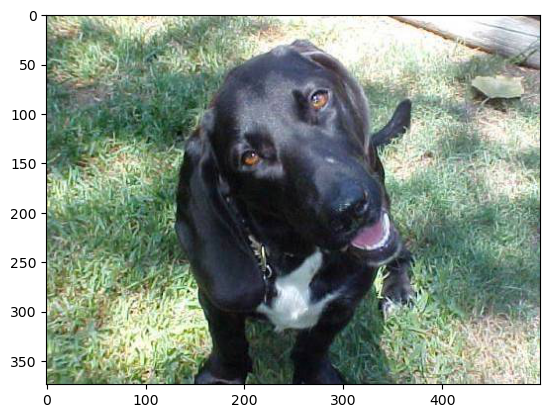

In [3]:
#show original image
image = np.array(mpimg.imread('C:/Users/User/Desktop/Recognition/CatDog/training_set/dogs/dog.114.jpg'))
image.setflags(write=1)
print('Image: ', image.shape)
plt.imshow(image)
plt.show()

### Tested Resized Images

Image:  (100, 100, 3)


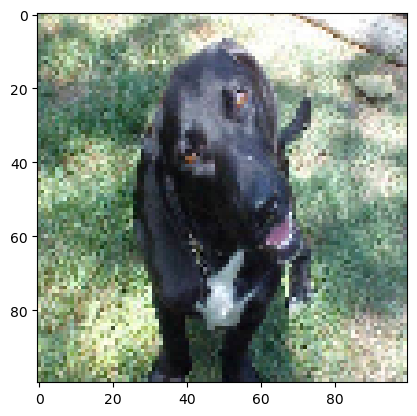

In [6]:
#Show resized image
resized_image = cv2.resize(image, (100, 100))
plt.imshow(resized_image)
print('Image: ', resized_image.shape)
plt.show()

### Extract HOG features from image

(8100,)
[0.16320409 0.16298724 0.09214159 ... 0.07909198 0.12154237 0.07802224]
Image:  (100, 100)


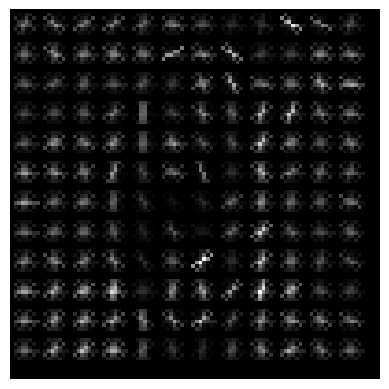

In [7]:
#show hog data of image and image
fd, hog_image = hog(resized_image, visualize=True, channel_axis=-1)
print(fd.shape)
print(fd)
print('Image: ', hog_image.shape)
plt.axis('off')
plt.imshow(hog_image, cmap='gray')
plt.show()

### Load splitting image reszing and extracting HOG features from training dataset

In [4]:
#Converting training dataset (dog) to hog data and image
train_data = []

dogs_set = []
for entry in glob.glob('C:/Users/User/Desktop/Recognition/CatDog/training_set/dogs/*.jpg'):
    image = np.array(mpimg.imread(entry))
    resized_image = cv2.resize(image, (50, 50))
    fd = hog(resized_image, channel_axis=-1)
    dogs_set.append(fd)

#Converting training dataset (cats) to hog data and image
cats_set = []
for entry in glob.glob('C:/Users/User/Desktop/Recognition/CatDog/training_set/cats/*.jpg'):
    image = np.array(mpimg.imread(entry))
    resized_image = cv2.resize(image, (50, 50))
    fd = hog(resized_image, channel_axis=-1)
    cats_set.append(fd)

#Combine all of it into train_data
train_data = dogs_set + cats_set
print(len(train_data))
    

8005


### Set the label to the traning data

In [5]:
#Categories train data and initialize each data as one of 2 categories
train_label = []
for i in range(len(train_data)):
    if i < 4004:
        train_label.append('dog')
    else:
        train_label.append('cat')
print(len(train_label))
    

8005


### Load splitting image reszing and extracting HOG features from testing dataset


In [6]:
dogs_test = []
for entry in glob.glob('C:/Users/User/Desktop/Recognition/CatDog/test_set/dogs/*.jpg'):
    image = np.array(mpimg.imread(entry))
    resized_image = cv2.resize(image, (50,50))
    fd=hog(resized_image, channel_axis=-1)
    test_dict = {'data':fd, 'label':'dog'}
    dogs_test.append(test_dict)
    
cats_test = []
for entry in glob.glob('C:/Users/User/Desktop/Recognition/CatDog/test_set/cats/*.jpg'):
    image = np.array(mpimg.imread(entry))
    resized_image = cv2.resize(image, (50,50))
    fd=hog(resized_image, channel_axis=-1)
    test_dict = {'data':fd, 'label':'cat'}
    dogs_test.append(test_dict)
    
test_data = dogs_test + cats_test
print(len(test_data))

2023


### Set the Label to the testing dataset

In [7]:
test_features = []
test_labels = []
for i in test_data:
    test_labels.append(i['label'])
    test_features.append(i['data'])
print(len(test_features))

2023


### Model Training and Evaluation (Euclidean)

In [10]:
axis=[]
f_euclidean = []
accurate = []
matrix = []

for k in range(10):
    knn_euclidean=KNeighborsClassifier(n_neighbors=k+1)
    knn_euclidean.fit(train_data, train_label)

    
    prediction = knn_euclidean.predict(test_features)
    
    accuracy = knn_euclidean.score(test_features, test_labels)
    accurate.append(accuracy)
    
    matrix.append(metrics.confusion_matrix(test_labels, prediction))
    
    f_euclidean.append(metrics.f1_score(test_labels, prediction, pos_label='dog'))
    
    axis.append(k+1)

### Show the the accuracy on each K

In [11]:
for i in range(len(f_euclidean)):
    print('K=', i+1, ', F1 SCORE=', f_euclidean[i], ', ACCURACY=', accurate[i], 'COFUSION MATRIX:', matrix[i])

K= 1 , F1 SCORE= 0.6858333333333333 , ACCURACY= 0.6272862086010875 COFUSION MATRIX: [[446 565]
 [189 823]]
K= 2 , F1 SCORE= 0.6576139670223083 , ACCURACY= 0.6510133465150766 COFUSION MATRIX: [[639 372]
 [334 678]]
K= 3 , F1 SCORE= 0.7131969514640996 , ACCURACY= 0.6465645081562037 COFUSION MATRIX: [[419 592]
 [123 889]]
K= 4 , F1 SCORE= 0.710411198600175 , ACCURACY= 0.6727632229362334 COFUSION MATRIX: [[549 462]
 [200 812]]
K= 5 , F1 SCORE= 0.7159046502540055 , ACCURACY= 0.6406327236777064 COFUSION MATRIX: [[380 631]
 [ 96 916]]
K= 6 , F1 SCORE= 0.7228215767634855 , ACCURACY= 0.6697973306969847 COFUSION MATRIX: [[484 527]
 [141 871]]
K= 7 , F1 SCORE= 0.7243911867027446 , ACCURACY= 0.6475531389026199 COFUSION MATRIX: [[373 638]
 [ 75 937]]
K= 8 , F1 SCORE= 0.7276406313233509 , ACCURACY= 0.6673257538309442 COFUSION MATRIX: [[451 560]
 [113 899]]
K= 9 , F1 SCORE= 0.7238749046529366 , ACCURACY= 0.6421156697973307 COFUSION MATRIX: [[350 661]
 [ 63 949]]
K= 10 , F1 SCORE= 0.725552050473186 , 

### Showing Result Comparison of each K

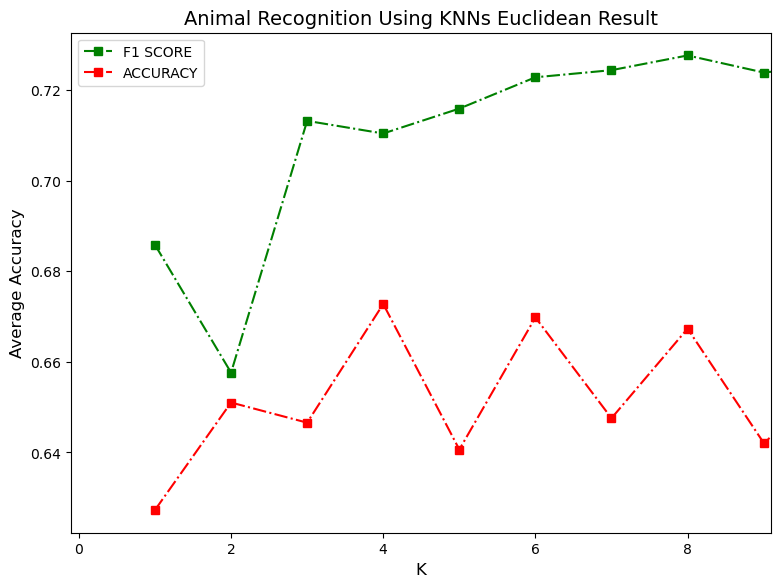

In [15]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
fig = plt.figure(figsize = (7,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Animal Recognition Using KNNs Euclidean Result', fontsize = 14)
ax.set_xlabel('K', fontsize = 12)
ax.set_ylabel('Average Accuracy', fontsize = 12)
plt.xlim(-0.1, 9.1)
plt.plot(x, f_euclidean, '-.gs', label = 'F1 SCORE')
plt.plot(x, accurate,'-.rs', label = 'ACCURACY')

ax.legend()

### Model Training and Evaluation (Manhattan)

In [12]:
f_manhattan = [] 
accurates = []
matrixes = []

for k in range(10):
    knn_manhattan = KNeighborsClassifier(n_neighbors=k+1, p=1)
    knn_manhattan.fit(train_data, train_label)
    
    predictions = knn_manhattan.predict(test_features)
    
    accuracies = knn_manhattan.score(test_features, test_labels)
    accurates.append(accuracies)
    
    matrixes.append(metrics.confusion_matrix(test_labels, predictions))
    
    f_manhattan.append(metrics.f1_score(test_labels, predictions, pos_label='dog'))
    

### Show the the accuracy on each K

In [13]:
  for i in range(len(f_manhattan)):
        print('K=', i+1, ', F1 SCORE=', f_manhattan[i], ', ACCURACY=', accurates[i], ', CONFUSION MATRIX:', matrixes[i])

K= 1 , F1 SCORE= 0.7021943573667712 , ACCURACY= 0.671280276816609 , CONFUSION MATRIX: [[574 437]
 [228 784]]
K= 2 , F1 SCORE= 0.6480985538296733 , ACCURACY= 0.6752347998022739 , CONFUSION MATRIX: [[761 250]
 [407 605]]
K= 3 , F1 SCORE= 0.7232568211346905 , ACCURACY= 0.6841324765200197 , CONFUSION MATRIX: [[549 462]
 [177 835]]
K= 4 , F1 SCORE= 0.7100820067534973 , ACCURACY= 0.7029164607019278 , CONFUSION MATRIX: [[686 325]
 [276 736]]
K= 5 , F1 SCORE= 0.7289799402475458 , ACCURACY= 0.6861097380128522 , CONFUSION MATRIX: [[534 477]
 [158 854]]
K= 6 , F1 SCORE= 0.7328385899814471 , ACCURACY= 0.7152743450321305 , CONFUSION MATRIX: [[657 354]
 [222 790]]
K= 7 , F1 SCORE= 0.746723044397463 , ACCURACY= 0.703905091448344 , CONFUSION MATRIX: [[541 470]
 [129 883]]
K= 8 , F1 SCORE= 0.7480847228481298 , ACCURACY= 0.7236777063766683 , CONFUSION MATRIX: [[634 377]
 [182 830]]
K= 9 , F1 SCORE= 0.74173294265383 , ACCURACY= 0.6950074147305981 , CONFUSION MATRIX: [[520 491]
 [126 886]]
K= 10 , F1 SCOR

### Showing Result Comparison of each K

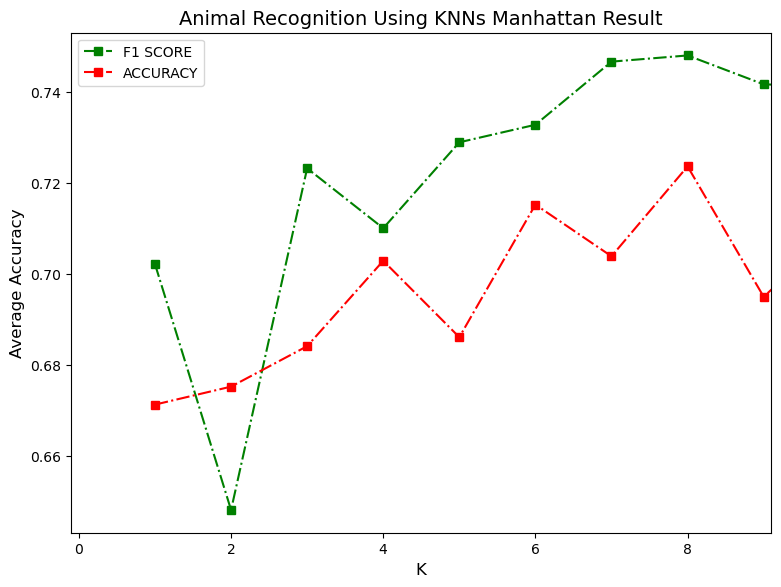

In [16]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
fig = plt.figure(figsize = (7,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Animal Recognition Using KNNs Manhattan Result', fontsize = 14)
ax.set_xlabel('K', fontsize = 12)
ax.set_ylabel('Average Accuracy', fontsize = 12)
plt.xlim(-0.1, 9.1)
plt.plot(x, f_manhattan, '-.gs', label = 'F1 SCORE')
plt.plot(x, accurates,'-.rs', label = 'ACCURACY')

ax.legend()